In [121]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [122]:
# Lê o arquivo de texto e cria uma lista de tuplas (origem, destino, peso)
edges = []
with open('grafo.txt', 'r') as file:
    for line in file:
        parts = line.split()
        source = int(parts[0])
        target = int(parts[1])
        weight = int(parts[2])
        if weight == 0:
            weight = 0
        edges.append((source, target, weight))

In [123]:
print(edges)

[(1, 2, 7), (1, 3, 5), (2, 4, 9), (3, 5, 6), (4, 5, 0), (4, 6, 11), (5, 7, 4), (6, 8, 3), (7, 8, 8), (8, 9, 6), (8, 10, 4), (10, 9, 0), (9, 11, 7)]


In [124]:
# Cria um grafo direcionado
G = nx.DiGraph()  # Para um grafo não direcionado, use nx.Graph()

In [125]:
# Adiciona nós ao grafo com rótulos A, B, C, ..., Z
nodes = set(source for source, target, _ in edges).union(target for source, target, _ in edges)
node_labels = {node: chr(65 + i) for i, node in enumerate(sorted(nodes))}
G.add_nodes_from(nodes)

In [126]:
# Adiciona arestas ao grafo com pesos
for source, target, weight in edges:
    G.add_edge(source, target, weight=weight)

In [127]:
# Define um mapeamento de cores para as arestas com peso zero
edge_colors = [(source, target, 'black' if weight != 0 else 'red') for source, target, weight in G.edges(data='weight')]

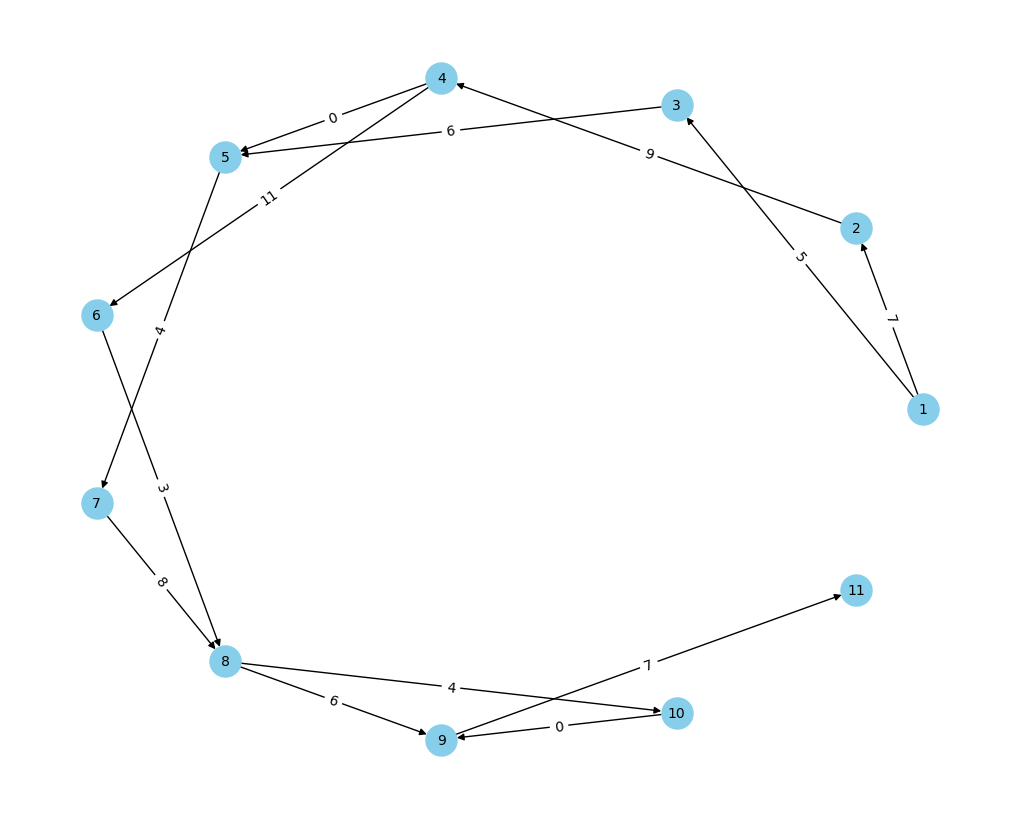

In [128]:
# Layout do grafo (spring_layout)
pos = nx.circular_layout(G)

# Plota o grafo com rótulos
plt.figure(figsize=(10, 8))

nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(source, target): weight for source, target, weight in G.edges(data='weight')}, font_size=10)
plt.show()


In [131]:
# Calcula as datas mais cedo (EC)
ec = {}
for node in nx.topological_sort(G):
    predecessors = list(G.predecessors(node))
    if not predecessors:  # Se não houver predecessores, EC é zero
        ec[node] = 0
    else:
        max_ec_predecessors = max([ec[predecessor] for predecessor in predecessors])
        ec[node] = max_ec_predecessors + G[predecessors[0]][node]['weight']
        #ec[node] = 0 + G[predecessors[0]][node]['weight']


# Calcula as datas mais tarde (LC)
lc = {}
for node in reversed(list(nx.topological_sort(G))):
    if G.out_degree(node) == 0:
        lc[node] = ec[node]
    else:
        lc[node] = min([lc[child] for child in G.neighbors(node)]) - G[node][list(G.neighbors(node))[0]]['weight']

# Calcula as margens
margins = {node: lc[node] - ec[node] for node in G.nodes()}

# Identifica o caminho crítico
critical_path = [node for node in G.nodes() if margins[node] == 0]

# Exibe os resultados
print("Datas Mais Cedo (EC):", ec)
print("Datas Mais Tarde (LC):", lc)
print("Margens:", margins)
print("Caminho Crítico:", critical_path)

Datas Mais Cedo (EC): {1: 0, 2: 7, 3: 5, 4: 9, 5: 6, 6: 11, 7: 4, 8: 3, 10: 4, 9: 6, 11: 7}
Datas Mais Tarde (LC): {11: 7, 9: 0, 10: 0, 8: -6, 7: -14, 6: -9, 5: -18, 4: -18, 3: -24, 2: -27, 1: -34}
Margens: {1: -34, 2: -34, 3: -29, 4: -27, 5: -24, 6: -20, 7: -18, 8: -9, 9: -6, 10: -4, 11: 0}
Caminho Crítico: [11]
